## Diabetes Prediction using different classifiers.

### MLMaverick Team
- Ishwinder Singh 300351938
- David Steven Salazar Villegas 300356922
- Seulah Lee 300361747

#### Import statements & importing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Dataset/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [3]:
#lets describe the data
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [4]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


#### Removing any null values 

In [5]:
df.isnull().values.any()

False

#### Plotting historgrams for all the features

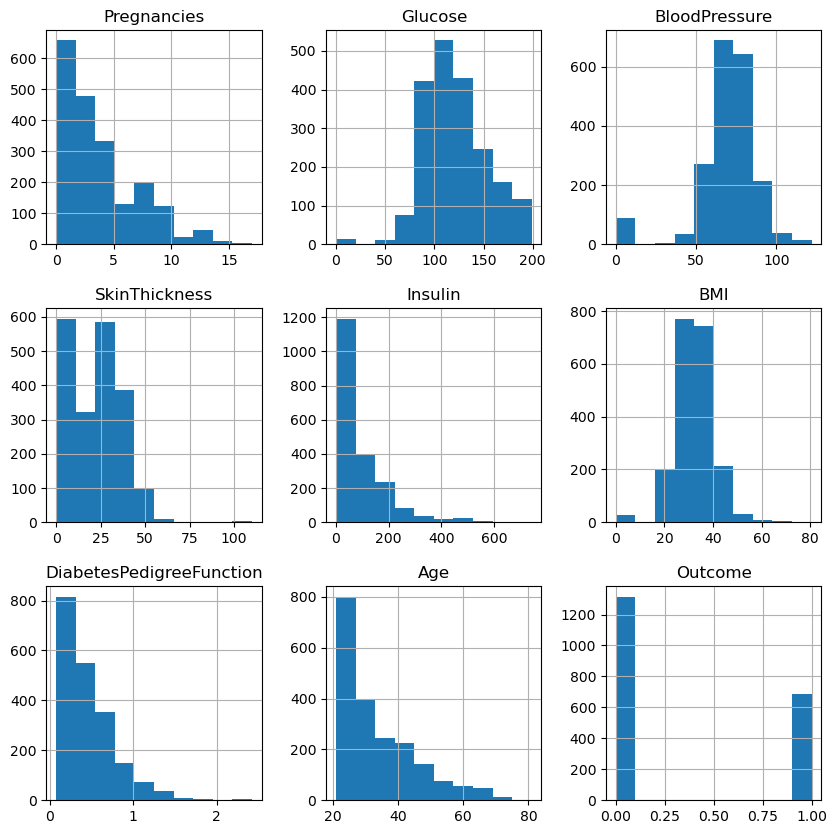

In [6]:
df.hist(bins=10,figsize=(10,10))
plt.show()

## Correlation

<Axes: >

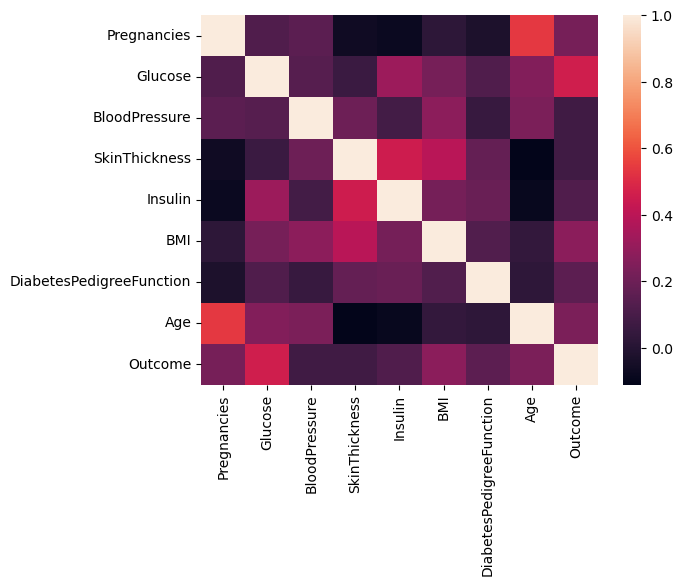

In [7]:
sns.heatmap(df.corr())

- we can see skin thickness,insulin,pregnencies and age are full independent to each other
- age and pregencies has negative correlation

#### lets count total outcome in each target 0 1
- 0 means no diabeted
- 1 means patient with diabtes

<Axes: xlabel='count', ylabel='Outcome'>

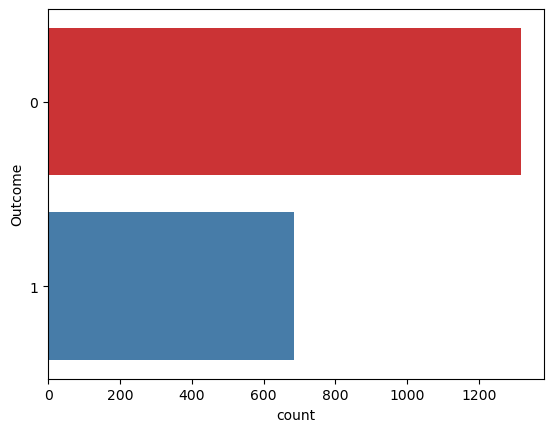

In [8]:
sns.countplot(y=df['Outcome'],palette='Set1')

### Scatter matrix with outliers

C:\Users\ishu7\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


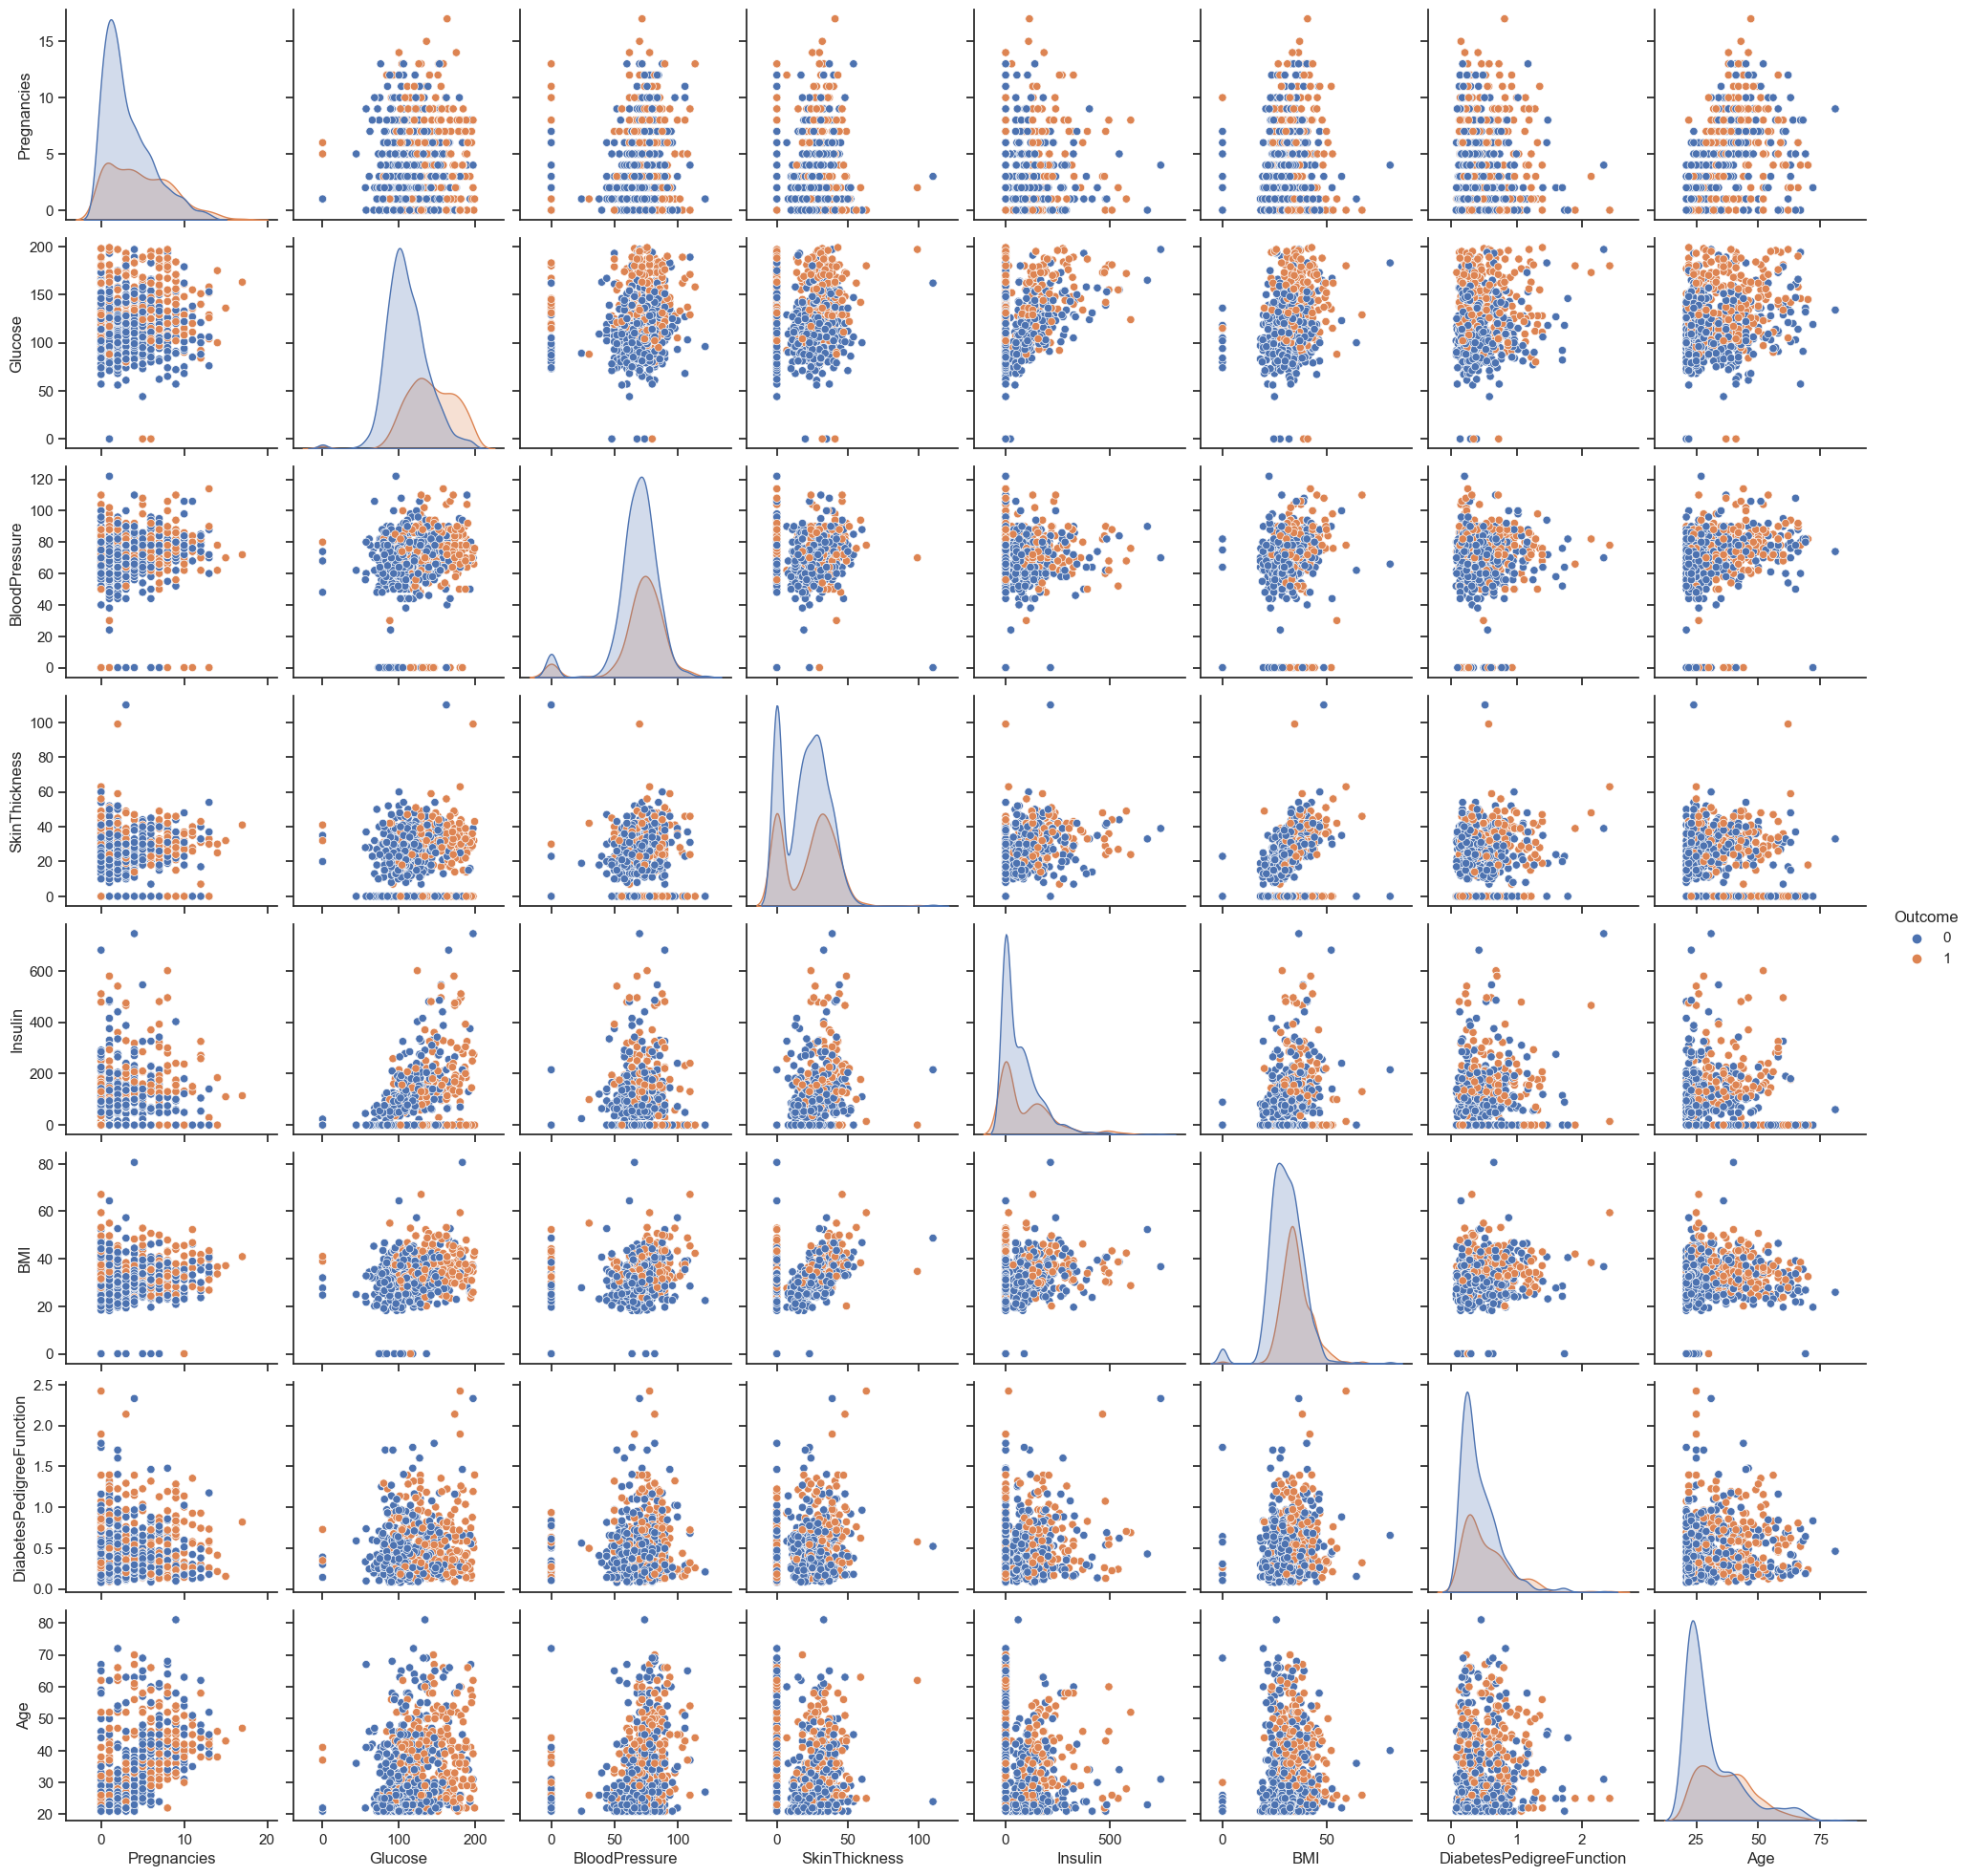

In [9]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

### Removing Outliers

In [10]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

### Scatter matrix after removing outlier

C:\Users\ishu7\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


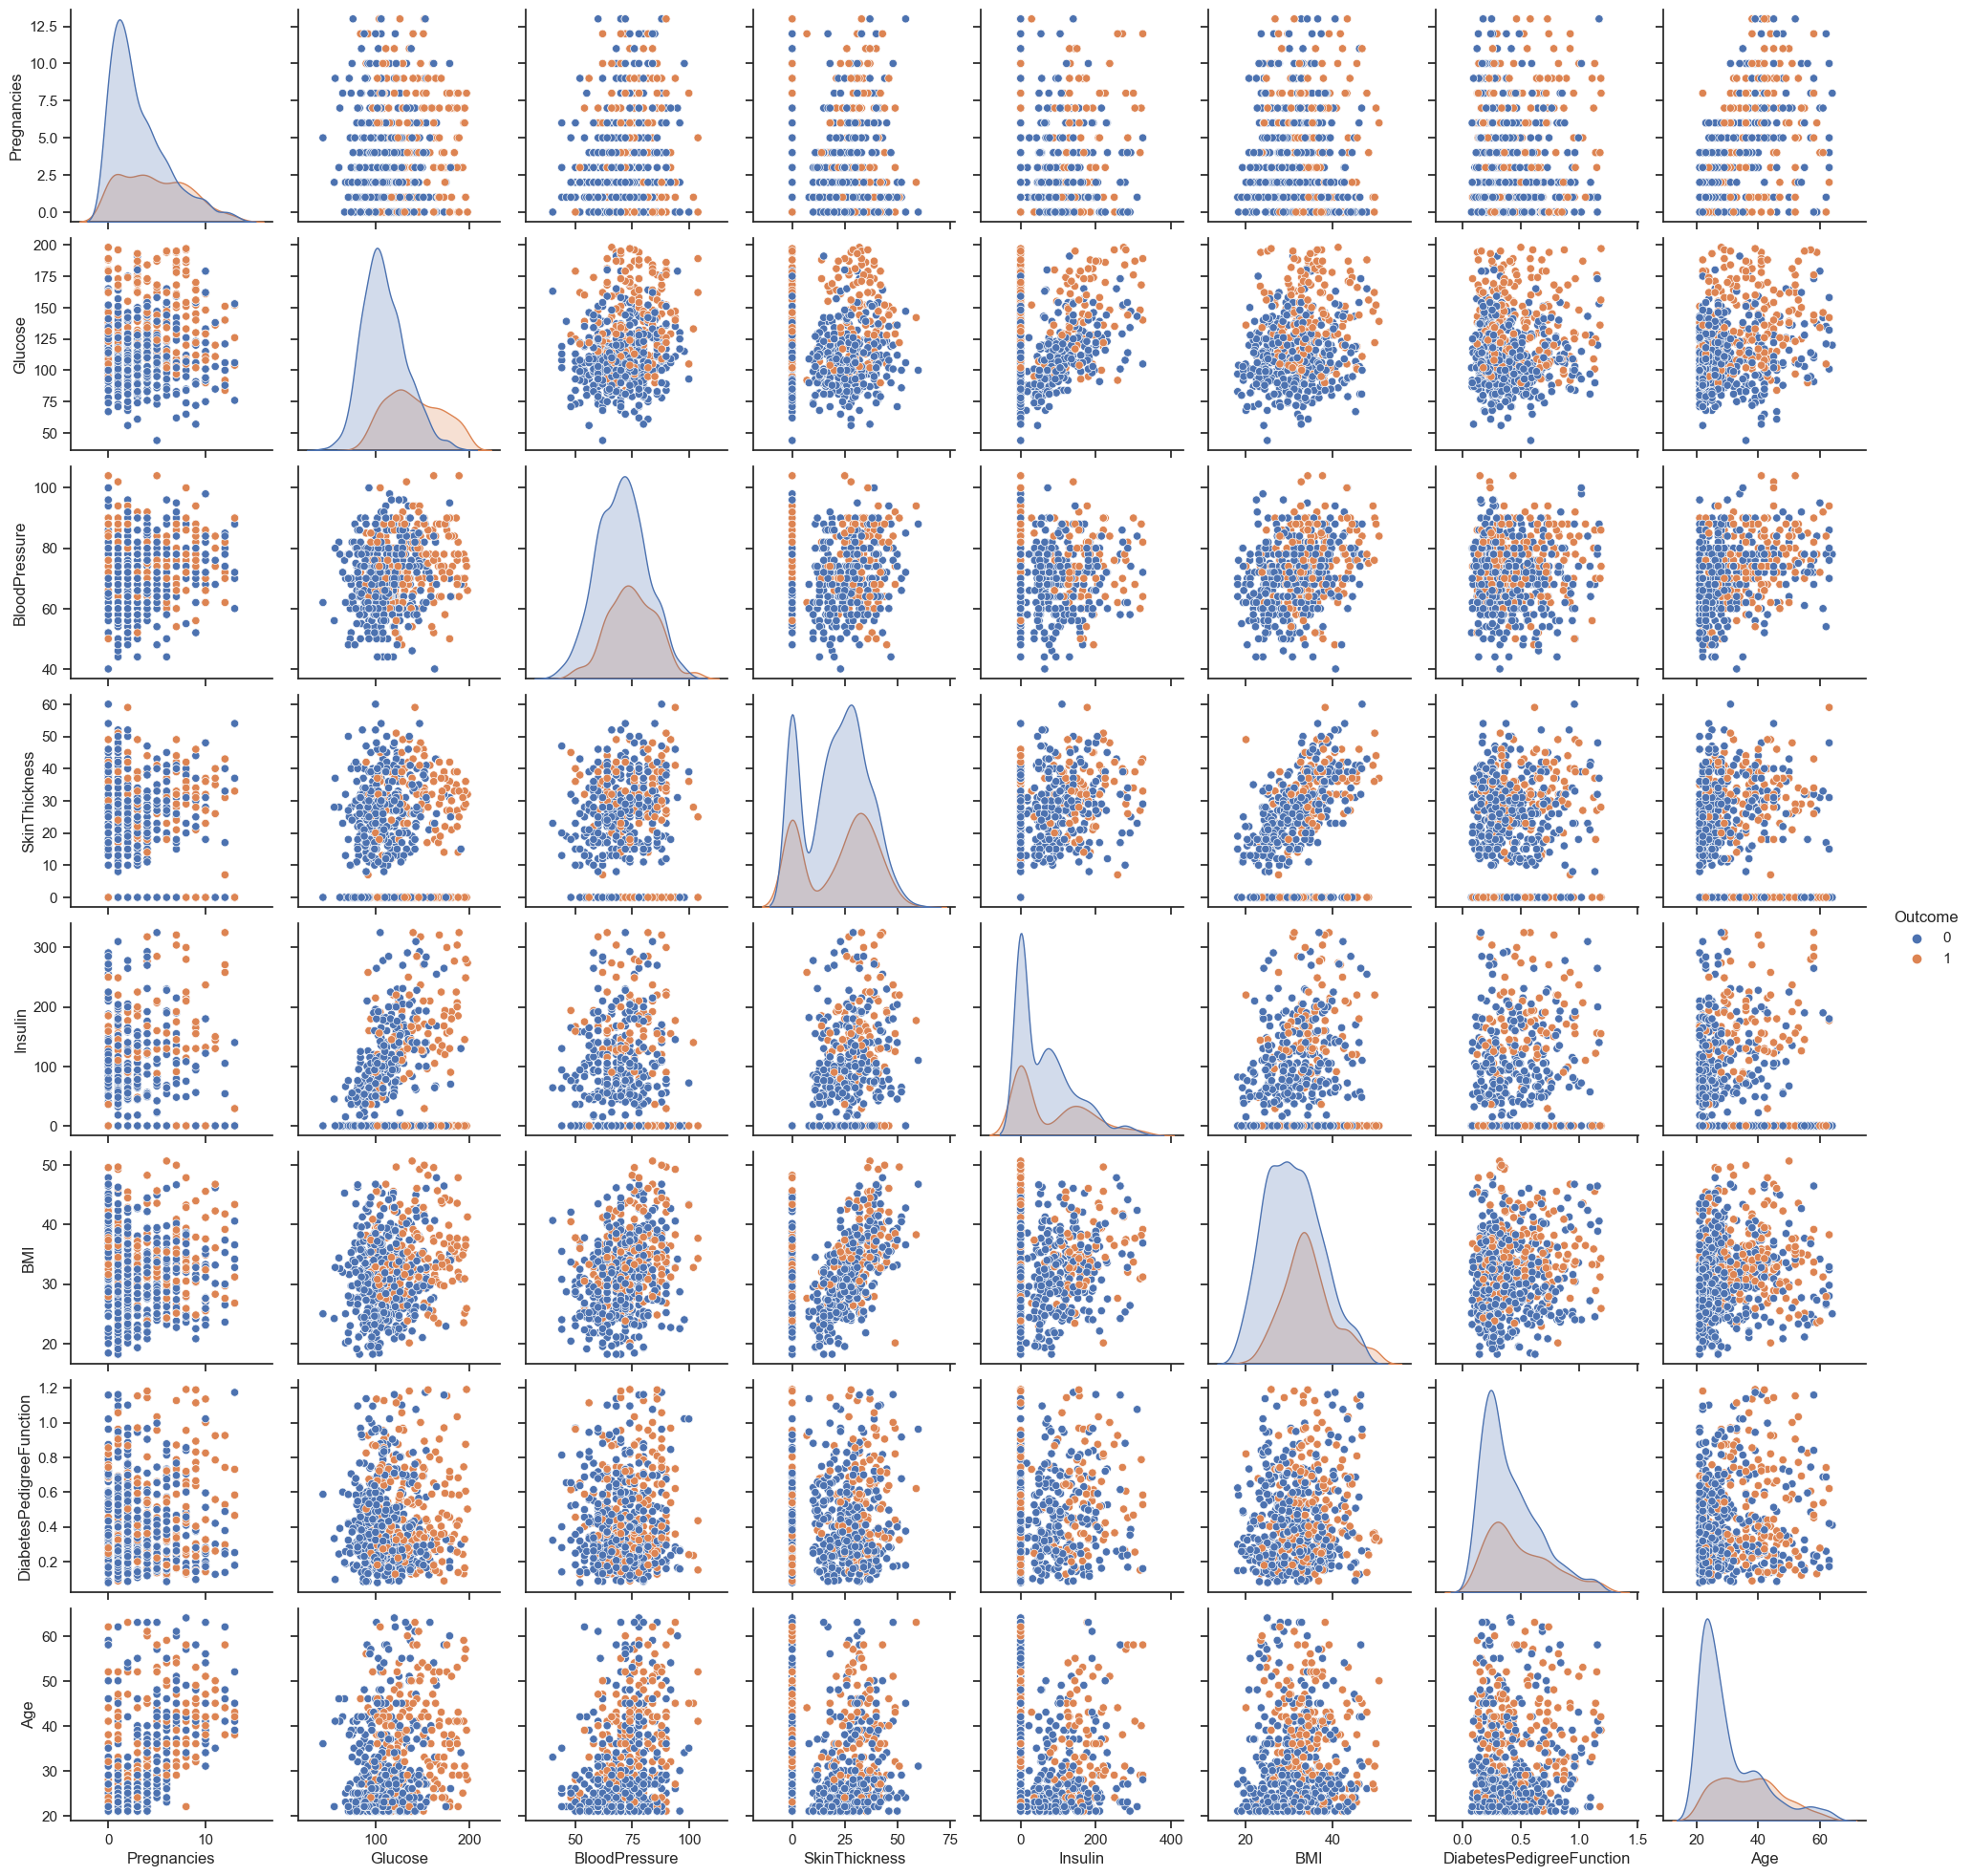

In [11]:
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

## Features & Traget variable

In [12]:
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

#### Splitting train test data 80 20 ratio

In [13]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [14]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

### Cross Validation

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

# Logistic Regression


Accuracy 0.7854984894259819 ROC 0.7057458176403608
TP:  [19 26 19 21 24 24 26 26 23 21]
TN:  [79 83 84 81 81 81 83 82 86 80]
FN:  [23 15 22 21 18 18 16 16 19 21]
FP:  [12  8  7  9  9  9  7  8  4 10]


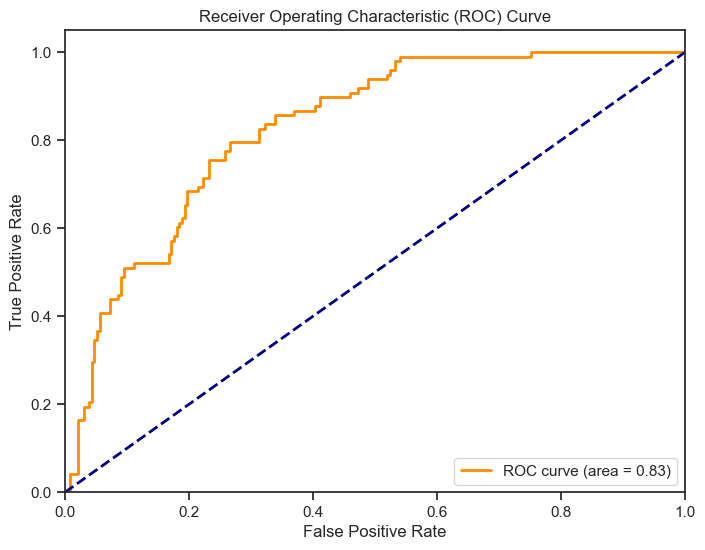

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

acc = []
roc = []

clf = LogisticRegression(max_iter=1000)  # Increasing max_iter to handle convergence warning
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# Find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)

# Find the ROC_AUC curve
rc = roc_auc_score(test_y, y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac, rc))

# Cross-validation scores
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

# ROC Curve
y_score = clf.predict_proba(test_X)[:, 1]  # Probability estimates for positive class
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Support Vector Machine

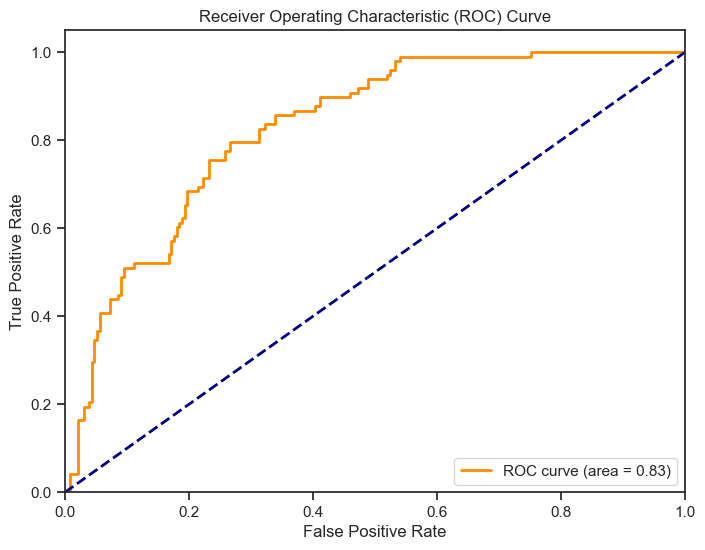

TP:  [19 26 19 21 24 24 26 26 23 21]
TN:  [79 83 84 81 81 81 83 82 86 80]
FN:  [23 15 22 21 18 18 16 16 19 21]
FP:  [12  8  7  9  9  9  7  8  4 10]


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC


clf.fit(train_X, train_y)

# Predict probabilities instead of classes
y_score = clf.decision_function(test_X)  # For SVC, decision_function gives scores

# Compute ROC curve values
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Cross-validated scores
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)



# KNN



Accuracy 0.8217522658610272 ROC 0.77288254357537
TP:  [21 32 32 30 33 31 37 29 34 29]
TN:  [82 80 87 89 85 81 81 80 69 82]
FN:  [21  9  9 12  9 11  5 13  8 13]
FP:  [ 9 11  4  1  5  9  9 10 21  8]


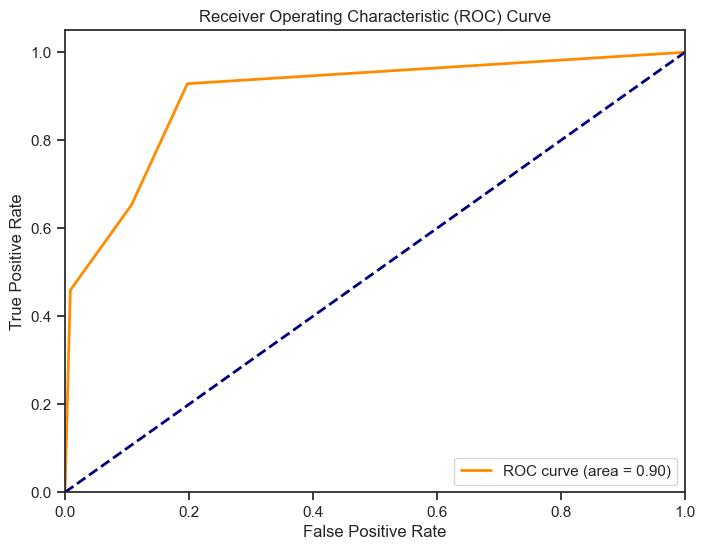

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

acc = []
roc = []

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# Find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)

# Find the ROC_AUC curve
rc = roc_auc_score(test_y, y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac, rc))

# Cross-validation scores
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

# ROC Curve
y_score = clf.predict_proba(test_X)[:, 1]  # Probability estimates for positive class
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random forest


Accuracy 0.9577039274924471 ROC 0.9433520189191557
TP:  [39 40 37 40 39 42 41 40 40 37]
TN:  [88 89 89 88 90 86 89 88 88 88]
FN:  [3 1 4 2 3 0 1 2 2 5]
FP:  [3 2 2 2 0 4 1 2 2 2]


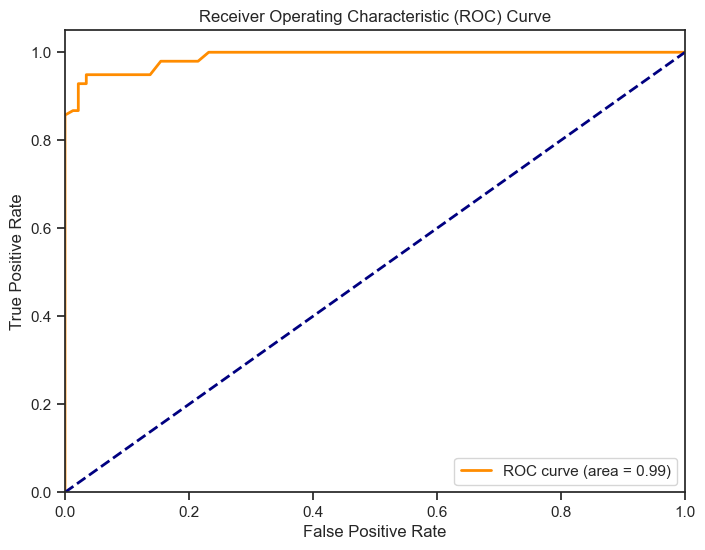

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

acc = []
roc = []

clf = RandomForestClassifier()
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# Find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)

# Find the ROC_AUC curve
rc = roc_auc_score(test_y, y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac, rc))

# Cross-validation scores
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

# Probability estimates for positive class
y_score = clf.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes Theorem


Accuracy 0.7673716012084593 ROC 0.7253875799246737
TP:  [23 25 25 25 32 26 28 26 23 22]
TN:  [74 78 75 72 81 76 78 76 83 75]
FN:  [19 16 16 17 10 16 14 16 19 20]
FP:  [17 13 16 18  9 14 12 14  7 15]


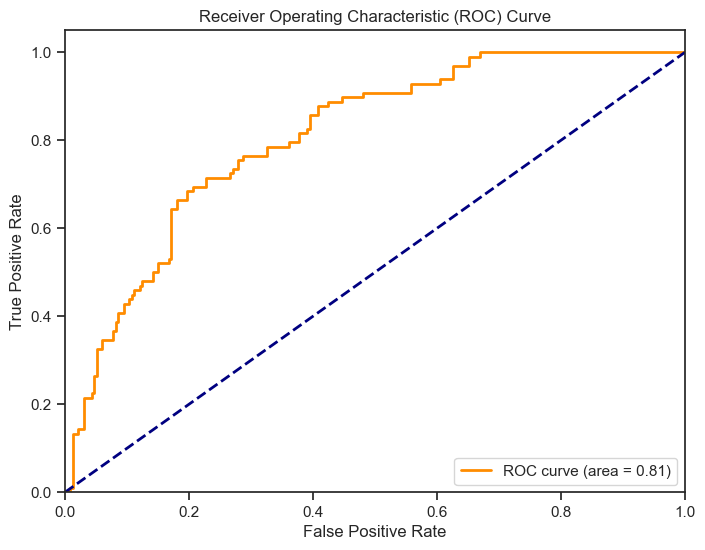

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

acc = []
roc = []

clf = GaussianNB()
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# Find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)

# Find the ROC_AUC curve
rc = roc_auc_score(test_y, y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac, rc))

# Cross-validation scores
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

# Probability estimates for positive class
y_score = clf.predict_proba(test_X)[:, 1]  # For GaussianNB, predict_proba gives probability estimates
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Gradient Boosting Classifier


Accuracy 0.8489425981873112 ROC 0.7951519663659455
TP:  [27 33 23 33 35 34 36 36 33 31]
TN:  [83 87 87 83 89 84 87 88 87 85]
FN:  [15  8 18  9  7  8  6  6  9 11]
FP:  [8 4 4 7 1 6 3 2 3 5]


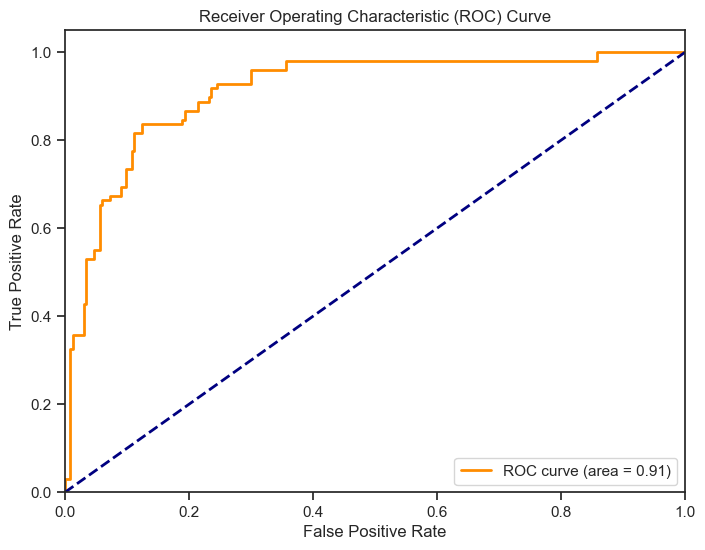

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

acc = []
roc = []

clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# Find accuracy
ac = accuracy_score(test_y, y_pred)
acc.append(ac)

# Find the ROC_AUC curve
rc = roc_auc_score(test_y, y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac, rc))

# Cross-validation scores
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

# Probability estimates for positive class
y_score = clf.predict_proba(test_X)[:, 1]  # For GradientBoostingClassifier, predict_proba gives probability estimates
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### Plotting comparison between different classifiers according to accuracy and ROC curve

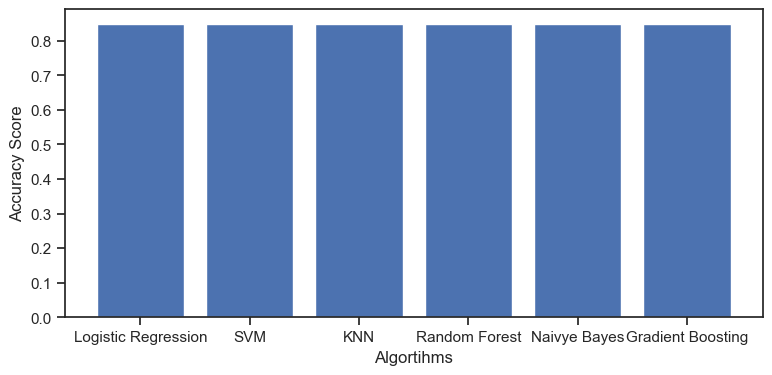

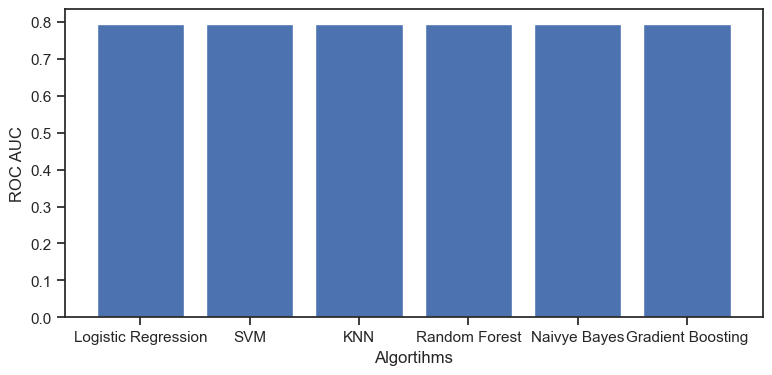

In [22]:
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

In [23]:
#Great....
#Random forest has highest accuracy 98% and ROC_AUC curve 97%
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient

#model can be improve with fine tunning